# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [5]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
 df = pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time']) #to convert time to date_time

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [9]:
df #date_time not sorted

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [10]:
df.describe() # if mean is close to median that means, There's no outliers.

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000,20000
mean,3278.186887,281.162680,0.048396,0.0,49.384600,2017-10-22 04:13:17.939999744
min,113.000000,243.390000,0.000000,0.0,0.000000,2016-11-18 15:00:00
25%,1228.750000,271.950000,0.000000,0.0,1.000000,2017-04-30 14:45:00
50%,3430.000000,281.825000,0.000000,0.0,75.000000,2017-10-21 07:30:00
75%,4928.000000,291.840000,0.000000,0.0,90.000000,2018-04-13 21:00:00
max,16781.000000,310.070000,10.600000,0.0,92.000000,2018-09-30 23:00:00
std,1977.171357,12.661288,0.398007,0.0,39.647341,NaN


In [11]:
df.sort_values(by='date_time',inplace=True)

In [12]:
df.duplicated().sum()

12

In [13]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [14]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [15]:
df.set_index('date_time',inplace=True)

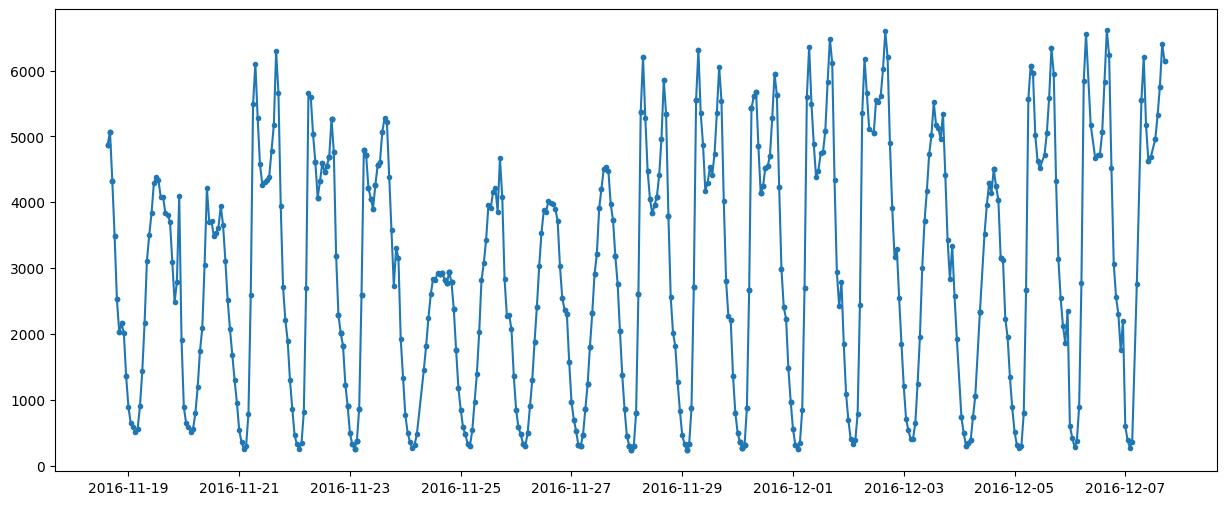

In [16]:
df_specific = df.iloc[:700]
plt.figure(figsize=(15, 6))
plt.plot(df_specific.index, df_specific['traffic_volume'], marker='.')
plt.show() # we notice there is a weekly pattern

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19968 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19968 non-null  float64
 1   temp                 19968 non-null  float64
 2   rain_1h              19968 non-null  float64
 3   snow_1h              19968 non-null  float64
 4   clouds_all           19968 non-null  int64  
 5   weather_main         19968 non-null  object 
 6   weather_description  19968 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [18]:
weekly_data = df.resample('W').agg({   #increasing the scale from hourly to weekly
  'traffic_volume': 'mean',
  'temp': 'mean',
  'rain_1h': 'mean',
  'snow_1h': 'mean',
  'clouds_all': 'mean',
  'weather_main': lambda x: x.mode()[0],
  'weather_description': lambda x: x.mode()[0]
})
weekly_data

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-20,2743.294118,271.270147,0.000000,0.0,56.823529,Clouds,sky is clear
2016-11-27,2545.708904,273.955205,0.000000,0.0,68.157534,Mist,mist
2016-12-04,3000.749064,275.831610,0.000000,0.0,87.348315,Rain,overcast clouds
2016-12-11,3181.322581,266.158479,0.000000,0.0,73.129032,Snow,light snow
2016-12-18,2950.348624,256.773743,0.000000,0.0,44.958716,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-09-02,3373.411765,293.413710,0.726742,0.0,53.162896,Rain,light rain
2018-09-09,3073.719665,291.749833,0.665858,0.0,46.175732,Rain,sky is clear
2018-09-16,3417.029240,296.505556,0.094912,0.0,22.883041,Clear,sky is clear


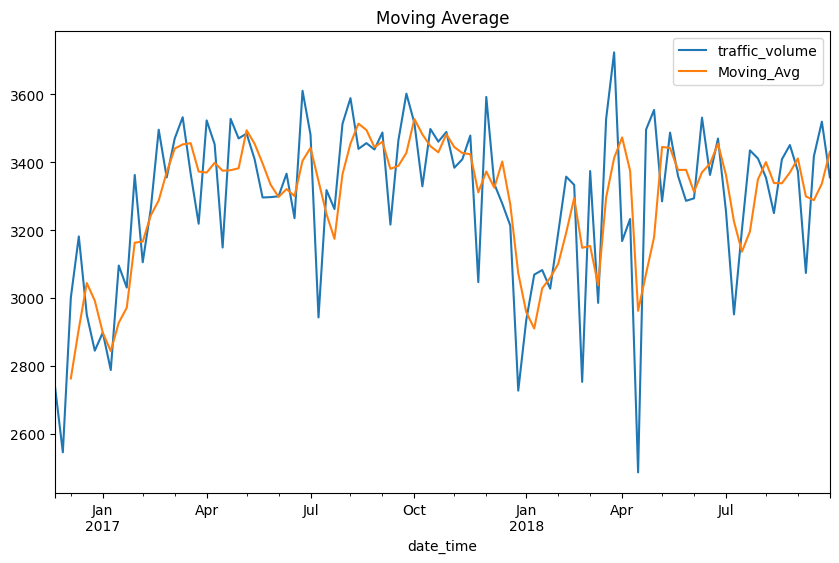

In [19]:
weekly_data['Moving_Avg'] = weekly_data['traffic_volume'].rolling(window=3).mean()
weekly_data[['traffic_volume', 'Moving_Avg']].plot(figsize=(10, 6))
plt.title('Moving Average')
plt.show()

<Figure size 3000x2000 with 0 Axes>

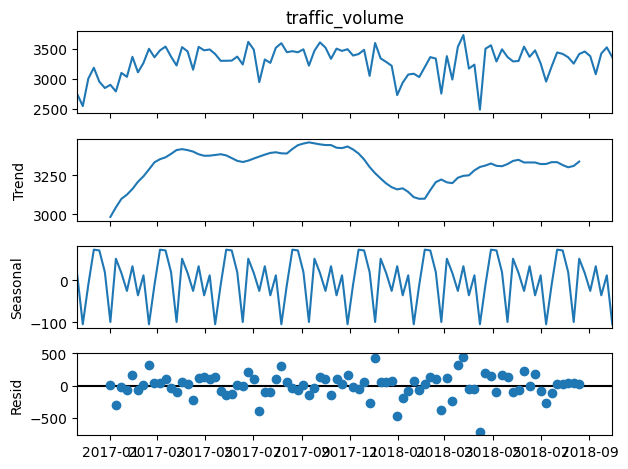

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(30, 20))
decomposition = seasonal_decompose(weekly_data['traffic_volume'], model='additive', period=12)
decomposition.plot()

plt.show()    #No clear trend, not obvious seasonal data

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [21]:
#Already handled missing values and duplicated
#sorted date_time
#date_time was set to Index
#already resampled the data to weekly to improve visualizations

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [22]:
for i in range(1,6):
  df[f'lag_{i}'] = df['traffic_volume'].shift(i) #5 lag features

df['Moving_Avg'] = df['traffic_volume'].rolling(window=3).mean() #moving average feature

df['traffic_volume_diff'] = df['traffic_volume'].diff() #1 difference feature
df.dropna(inplace=True)

df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

In [23]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,lag_1,lag_2,lag_3,lag_4,lag_5,Moving_Avg,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,,,,,
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,5074.0,5074.0,4872.0,4872.0,4872.0,5074.000000,0.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,5074.0,5074.0,5074.0,4872.0,4872.0,4825.333333,-746.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4328.0,5074.0,5074.0,5074.0,4872.0,4576.666667,0.0,4,11,323
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,4328.0,4328.0,5074.0,5074.0,5074.0,4328.000000,0.0,4,11,323
2016-11-18 18:00:00,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,4328.0,4328.0,4328.0,5074.0,5074.0,4047.333333,-842.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,3947.0,4132.0,4283.0,4302.0,4302.0,3874.000000,-404.0,6,9,273
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3543.0,3947.0,4132.0,4283.0,4302.0,3423.666667,-762.0,6,9,273
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2781.0,3543.0,3947.0,4132.0,4283.0,2827.666667,-622.0,6,9,273


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [24]:
import tensorflow as tf
from tensorflow import keras

keras.utils.set_random_seed(42) #Adjusting the seed so all models train with same set of data

In [25]:
from sklearn.model_selection import train_test_split

X=df.drop('traffic_volume',axis=1)
y=df['traffic_volume']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False , random_state=42) #ensure shuffle is False to maintain the time order of the data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=False, random_state=42)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [26]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [27]:
num_col = X_train.select_dtypes(include='number').columns
cat_col = X_train.select_dtypes(include='object').columns

In [28]:
onehot = OneHotEncoder(drop='first')
scaler =  MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  #Scale numerical features
        ('cat', onehot, cat_col)  #OneHotEncode categorical features
    ])



In [29]:
cat_col

Index(['weather_main', 'weather_description'], dtype='object')

In [30]:
X_train.shape, X_val.shape, X_test.shape

((12776, 16), (3194, 16), (3993, 16))

In [31]:
y_train.shape, y_val.shape, y_test.shape

((12776,), (3194,), (3993,))

In [32]:
train_time = X_train.index
val_time = X_val.index      #after encoding and transforming the index resets, so i have to save them
test_time = X_test.index


In [33]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_val = preprocessor.transform(X_val).toarray()  #it outputs sparse matrix so we use .toarray()
X_test = preprocessor.transform(X_test).toarray()

In [34]:
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_val = pd.DataFrame(X_val, columns=preprocessor.get_feature_names_out())  #creating dataframe from array
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_val = scaler.transform(y_val.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))
y_train = pd.DataFrame(y_train, columns=['traffic_volume'])
y_val = pd.DataFrame(y_val, columns=['traffic_volume'])
y_test = pd.DataFrame(y_test, columns=['traffic_volume'])


In [35]:
X_train.index = train_time
X_val.index = val_time
X_test.index = test_time
                                #Setting index again
y_train.index = train_time
y_val.index = val_time
y_test.index = test_time

In [36]:
X_train

,num__temp,num__rain_1h,num__snow_1h,num__clouds_all,num__lag_1,num__lag_2,num__lag_3,num__lag_4,num__lag_5,num__Moving_Avg,...,cat__weather_description_shower drizzle,cat__weather_description_sky is clear,cat__weather_description_sleet,cat__weather_description_smoke,cat__weather_description_snow,cat__weather_description_thunderstorm,cat__weather_description_thunderstorm with heavy rain,cat__weather_description_thunderstorm with light drizzle,cat__weather_description_thunderstorm with light rain,cat__weather_description_thunderstorm with rain
date_time,,,,,,,,,,,,,,,,,,,,,
2016-11-18 16:00:00,0.478548,0.0,0.0,0.978261,0.297636,0.297636,0.285517,0.285517,0.285517,0.503808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 17:00:00,0.475090,0.0,0.0,0.978261,0.297636,0.297636,0.297636,0.285517,0.285517,0.478555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 17:00:00,0.475090,0.0,0.0,0.978261,0.252880,0.297636,0.297636,0.297636,0.285517,0.453302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 17:00:00,0.475090,0.0,0.0,0.978261,0.252880,0.252880,0.297636,0.297636,0.297636,0.428049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-18 18:00:00,0.474619,0.0,0.0,0.978261,0.252880,0.252880,0.252880,0.297636,0.297636,0.399546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-26 14:00:00,0.582115,0.0,0.0,0.217391,0.315995,0.317255,0.294936,0.274778,0.289537,0.538438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-26 15:00:00,0.575672,0.0,0.0,0.815217,0.321034,0.315995,0.317255,0.294936,0.274778,0.552283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-26 16:00:00,0.571429,0.0,0.0,0.010870,0.341793,0.321034,0.315995,0.317255,0.294936,0.592262,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12776 entries, 2016-11-18 16:00:00 to 2018-01-26 18:00:00
Data columns (total 56 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   num__temp                                                     12776 non-null  float64
 1   num__rain_1h                                                  12776 non-null  float64
 2   num__snow_1h                                                  12776 non-null  float64
 3   num__clouds_all                                               12776 non-null  float64
 4   num__lag_1                                                    12776 non-null  float64
 5   num__lag_2                                                    12776 non-null  float64
 6   num__lag_3                                                    12776 non-null  float64
 7   num__lag_4                      

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [38]:
from keras import layers
#seed already was set to 42

In [71]:
#while creating the 3 models, all will have the same arch to do a fair comparasion

In [72]:
#Model Arch

model_RNN = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(32, return_sequences=True, recurrent_dropout=0.15),
    layers.SimpleRNN(64),
    layers.Dropout(0.15),
    layers.Dense(1), # <-- Regression
])

model_RNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 56, 32)              │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:

model_lstm = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.LSTM(32, return_sequences=True, recurrent_dropout=0.15),
    layers.LSTM(64),
    layers.Dropout(0.15),
    layers.Dense(1),
])

model_lstm.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 56, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model_gru = keras.models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.GRU(32, return_sequences=True, recurrent_dropout=0.15),
    layers.GRU(64),
    layers.Dropout(0.15),
    layers.Dense(1),  # <-- Regression
])

model_gru.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, 56, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 64)                  │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,241 (86.88 KB)

 Trainable params: 22,241 (86.88 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model_RNN.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

model_lstm.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

model_gru.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

In [76]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=30,                                  #i won't use callbacks to let all models runs the same number of epochs
    restore_best_weights=True,
)


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [77]:
RNN_history = model_RNN.fit(
    X_train, y_train,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False, #we can turn this True no problem  since this shuffles the batches
    callbacks=[early_stopping]
)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.3081 - mean_squared_error: 0.1616 - val_loss: 0.1095 - val_mean_squared_error: 0.0159
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1551 - mean_squared_error: 0.0376 - val_loss: 0.1046 - val_mean_squared_error: 0.0146
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1258 - mean_squared_error: 0.0236 - val_loss: 0.0868 - val_mean_squared_error: 0.0110
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1078 - mean_squared_error: 0.0175 - val_loss: 0.0731 - val_mean_squared_error: 0.0085
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0962 - mean_squared_error: 0.0139 - val_loss: 0.0651 - val_mean_squared_error: 0.0063
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0947 - mean_squared_error: 0.0136 - val_loss: 0.0633 - val_mean_squared_error: 0.0062
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0930 - mean_squared_error: 0.0131 - val_los

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [78]:
RNN_pred = model_RNN.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error #, root_mean_squared_error  couldn't import it give me error

In [81]:
MAE = mean_absolute_error(y_test, RNN_pred)
MSE = mean_squared_error(y_test, RNN_pred)
RMSE = np.sqrt(MSE)   #taking the root of MSE since importing RMSE gives me error
MAPE = mean_absolute_percentage_error(y_test, RNN_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MAPE: {MAPE}')

MAE: 0.018323107503043414
MSE: 0.0008298014951924001
RMSE: 0.028806275274536972
MAPE: 0.3452894933156546


<Axes: xlabel='date_time'>

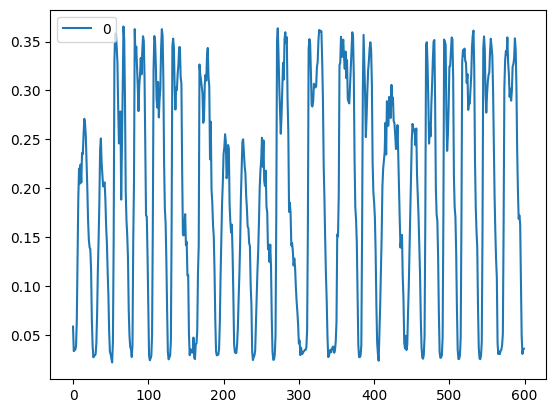

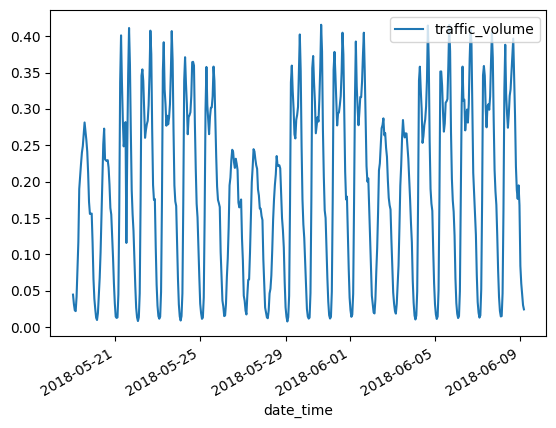

In [82]:

pd.DataFrame(RNN_pred)[:600].plot()  #slicing since we have many data
pd.DataFrame(y_test)[:600].plot() #the best preditions so far

<Axes: >

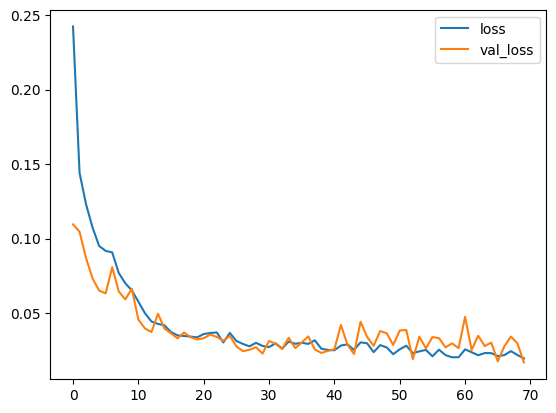

In [83]:
pd.DataFrame(RNN_history.history)[['loss','val_loss']].plot()  #intresting loss decreasing

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [84]:
LSTM_history = model_lstm.fit(
     X_train, y_train,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - loss: 0.1129 - mean_squared_error: 0.0179 - val_loss: 0.1091 - val_mean_squared_error: 0.0154
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - loss: 0.1000 - mean_squared_error: 0.0137 - val_loss: 0.1027 - val_mean_squared_error: 0.0139
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.0981 - mean_squared_error: 0.0133 - val_loss: 0.1070 - val_mean_squared_error: 0.0154
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0925 - mean_squared_error: 0.0119 - val_loss: 0.1034 - val_mean_squared_error: 0.0141
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 0.0893 - mean_squared_error: 0.0114 - val_loss: 0.0868 - val_mean_squared_error: 0.0105
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 0.1026 - mean_squared_error: 0.0143 - val_loss: 0.0925 - val_mean_squared_error: 0.0119
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.1057 - mean_squared_error: 0.0154 - v

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [85]:
LSTM_pred = model_lstm.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [90]:
MAE = mean_absolute_error(y_test, LSTM_pred)
MSE = mean_squared_error(y_test, LSTM_pred)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, LSTM_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MAPE: {MAPE}')

MAE: 0.10376254692439478
MSE: 0.013957760469891702
RMSE: 0.11814296623113753
MAPE: 1.8845451818761503


<Axes: xlabel='date_time'>

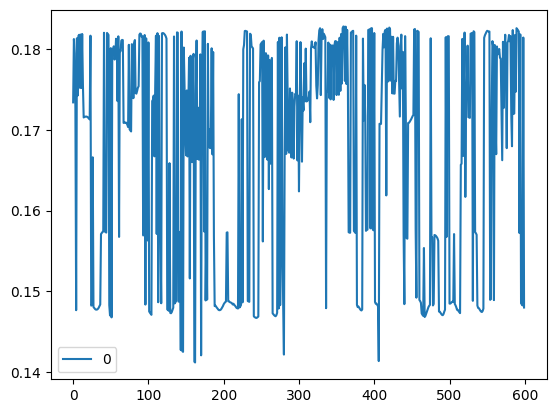

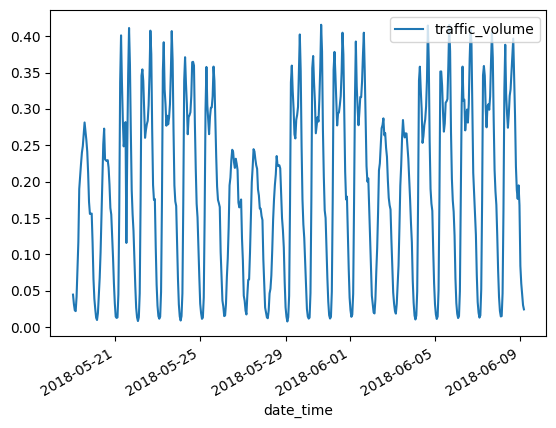

In [91]:

pd.DataFrame(LSTM_pred)[:600].plot()
pd.DataFrame(y_test)[:600].plot()  #might give better result with more training

<Axes: >

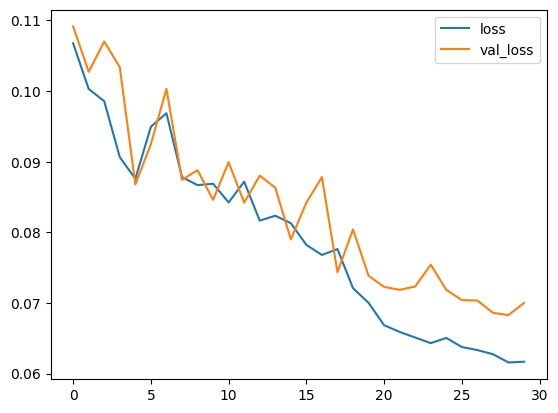

In [92]:
pd.DataFrame(LSTM_history.history)[['loss','val_loss']].plot()   #loss decreasing.

In [93]:
# Model 3

In [94]:
GRU_history = model_gru.fit(
    X_train, y_train,
    epochs=70,
    batch_size=128,
    validation_data=(X_val, y_val),
    shuffle=False,

)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 117ms/step - loss: 0.1111 - mean_squared_error: 0.0172 - val_loss: 0.1087 - val_mean_squared_error: 0.0153
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 163ms/step - loss: 0.1018 - mean_squared_error: 0.0138 - val_loss: 0.1087 - val_mean_squared_error: 0.0153
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - loss: 0.1019 - mean_squared_error: 0.0139 - val_loss: 0.1089 - val_mean_squared_error: 0.0154
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - loss: 0.1020 - mean_squared_error: 0.0140 - val_loss: 0.1092 - val_mean_squared_error: 0.0154
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.1018 - mean_squared_error: 0.0139 - val_loss: 0.1090 - val_mean_squared_error: 0.0154
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.1017 - mean_squared_error: 0.0139 - val_loss: 0.1090 - val_mean_squared_error: 0.0154
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.1017 - mean_squared_error: 0.

In [95]:
GRU_pred = model_gru.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


In [96]:
MAE = mean_absolute_error(y_test, GRU_pred)
MSE = mean_squared_error(y_test, GRU_pred)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, GRU_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MAPE: {MAPE}')

MAE: 0.09934098206704865
MSE: 0.013518478571773912
RMSE: 0.11626899230566123
MAPE: 2.296060978231241


<Axes: xlabel='date_time'>

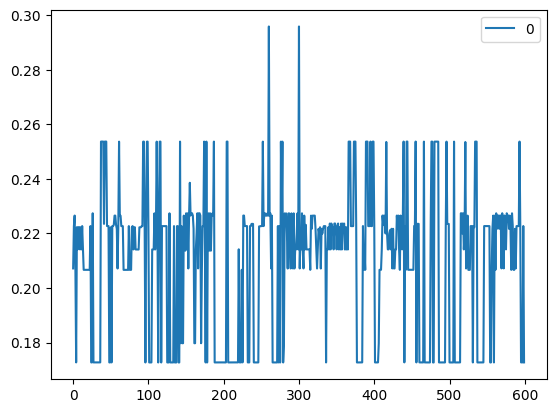

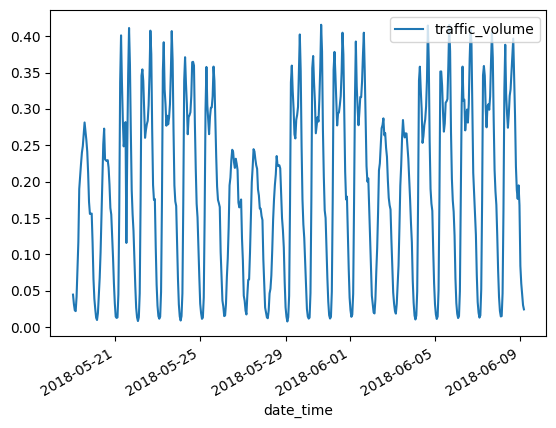

In [97]:

pd.DataFrame(GRU_pred)[:600].plot()
pd.DataFrame(y_test)[:600].plot() #bad predictions (no match)

<Axes: >

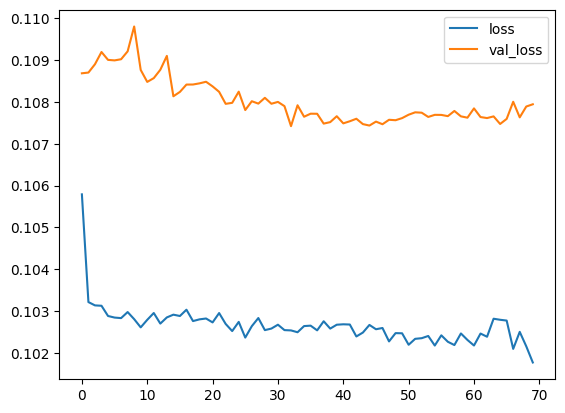

In [98]:
pd.DataFrame(GRU_history.history)[['loss','val_loss']].plot()   #overfitting

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

**NOTE**: i applied 3 models with same arch on purpose to compare between models.

1. in the preprocessing i applied normalization (MinMaxScaler) on all numerical values to make the computation easier and better for the neural network, for the missing values  there was a small number of missing values so i dropped it

2. for feature engineering: i applied moving average, 5 lag features,and difference, so that the model can learn weather there's a pattern for the traffic volume.

3. for model i architecture i used same architecture for all model to easy compare between models.

4. my hyper parameters were chosen for time efficiency to speed run the test.

5. for the loss function i used MAE because its simple and not sensitive to outliers, but in the evaluation for test i used all 4 metrics for regression (MAE,MSE,RMSE,MAPE).

6. first i applied 32,64,128 layers but it took long time so i removed the last layer and added callbacks.

7. well, 2 models performed really great when it comes to validation set and testing but for the GRU it overfitted so easily from the beginning, to solve this issue i think the better solution is to reduce the number of units,layers of GRU model ,but here we are experimenting a difference between models giving same architecture.

8. in the future imma change create more diff features i might remove the weather description column to save memory and convert int64 to int32 and so on.., other idea i would implement ARIMA and SARIMA to seek better results


**My observations**: so far the best model was RNN, but i think other models would give better predictions when simplifying its arch.